<a href="https://colab.research.google.com/github/Erwin-Eli-Parada/Graficaci-n-sexto-semestre/blob/main/Copia_de_LaberintoGL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Laberinto**
Escribe un programa en OpenGL que dibuje el siguiente laberinto, utiliza cuadrados para hacer el dibujo. Las dimenciones del laberinto son 1x1

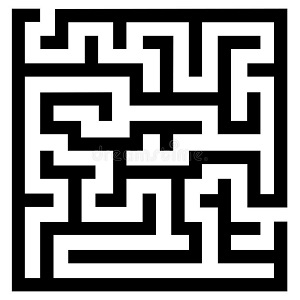

In [ ]:
%tensorflow_version 1.x
!pip install -q tensorflow>=2.0.0
!pip install -q folium==0.2.1
!pip install -q imgaug>=0.2.5
!pip install -q gast==0.2.2
!pip install -q lucid>=0.2.3
!pip install -q moviepy

TensorFlow 1.x selected.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.2 which is incompatible.
     |████████████████████████████████| 71kB 5.3MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files

import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3104768/45929032 bytes (6.8%)6840320/45929032 bytes (14.9%)10674176/45929032 bytes (23.2%)14647296/45929032 bytes (31.9%)18653184/45929032 bytes (40.6%)22544384/45929032 bytes (49.1%)26443776/45929032 bytes (57.6%)30310400/45929032 bytes (66.0%)33857536/45929032 bytes (73.7%)37879808/45929032 bytes (82.5%)41754624/45929032 bytes (90.9%)45654016/45929032 bytes (99.4%)

In [ ]:
import ctypes.util

from lucid.misc.gl.glcontext import create_opengl_context

import OpenGL.GL as gl

import os
os.environ["PYOPENGL_PLATFORM"] = "egl"

WIDTH, HEIGHT = 400, 400
create_opengl_context((WIDTH, HEIGHT))


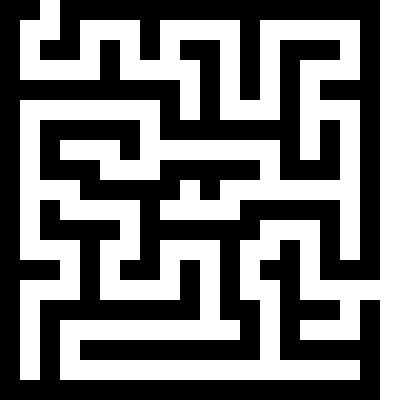

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

def cuadrado(x,y):
  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(x+.05,y+.05)
  gl.glVertex2f(x-.05,y+.05)
  gl.glVertex2f(x-.05,y-.05)
  gl.glVertex2f(x+.05,y-.05)
  gl.glEnd()

def dibujar(x,y,veces,orientacion):
  for i in range(veces):
    if orientacion=="derecha":
      cuadrado(x,y)
      x=x+0.1
    elif orientacion=="izquierda":
      cuadrado(x,y)
      x=x-0.1
    elif orientacion=="arriba":
      cuadrado(x,y)
      y=y+0.1
    elif orientacion=="abajo":
      cuadrado(x,y)
      y=y-0.10

dibujar(-0.75,.95,2,"abajo")
dibujar(-0.85,.85,3,"abajo")
dibujar(-0.85,.65,3,"derecha")
dibujar(-0.55,.65,3,"arriba")
dibujar(-0.55,.85,3,"derecha")
dibujar(-0.35,.85,3,"abajo")
dibujar(-0.35,.65,4,"derecha")
dibujar(-0.05,.65,3,"abajo")
dibujar(-0.15,.65,3,"arriba")
dibujar(-0.15,.85,4,"derecha")
dibujar(0.15,.85,5,"abajo")
dibujar(0.15,.45,3,"derecha")
dibujar(0.35,.45,5,"arriba")
dibujar(0.35,.85,5,"derecha")
dibujar(0.75,.85,3,"abajo")
dibujar(0.75,.65,3,"izquierda")
dibujar(0.55,.65,5,"abajo")
dibujar(0.55,.45,3,"derecha")
dibujar(0.75,.45,8,"abajo")
dibujar(0.75,.05,7,"izquierda")
dibujar(0.15,.05,2,"abajo")
dibujar(0.15,-.05,4,"izquierda")
dibujar(-0.05,-.05,2,"arriba")
dibujar(0.35,.05,3,"arriba")
dibujar(0.35,.25,7,"izquierda")
dibujar(-0.25,.15,4,"arriba")
dibujar(-0.25,.15,3,"izquierda")
dibujar(-0.45,.25,3,"izquierda")
dibujar(-0.25,.45,7,"izquierda")
dibujar(-0.85,.45,8,"abajo")
dibujar(-0.85,.05,3,"derecha")
dibujar(-0.85,-.25,3,"derecha")
dibujar(-0.65,-.25,3,"abajo")
dibujar(-0.65,-.45,3,"izquierda")
dibujar(-0.85,-.45,5,"abajo")
dibujar(-0.65,-.05,4,"derecha")
dibujar(-0.35,-.05,3,"abajo")
dibujar(-0.45,-.25,3,"abajo")
dibujar(-0.45,-.45,4,"derecha")
dibujar(-0.15,-.45,3,"arriba")
dibujar(-0.15,-.25,3,"derecha")
dibujar(0.05,-.25,5,"abajo")
dibujar(.15,-.65,9,"izquierda")
dibujar(-0.65,-.65,3,"abajo")
dibujar(-0.65,-.85,15,"derecha")
dibujar(0.35,-.85,5,"arriba")
dibujar(0.25,-.45,3,"arriba")
dibujar(0.35,-.25,2,"arriba")
dibujar(0.35,-.15,3,"derecha")
dibujar(0.55,-.15,4,"abajo")
dibujar(0.55,-.45,4,"derecha")
dibujar(0.75,-.45,3,"abajo")
dibujar(0.75,-.65,3,"izquierda")
dibujar(0.95,0.95,20,"abajo")

# Read the result
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)